In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

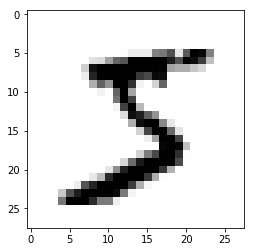

In [11]:
plt.imshow(single_image, cmap='gist_yarg')

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train.shape

(60000,)

In [15]:
y_example = to_categorical(y_train)

In [16]:
y_example.shape

(60000, 10)

In [18]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [20]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [21]:
single_image.max()

255

In [22]:
single_image.min()

0

In [23]:
x_train = x_train/255

In [24]:
x_test = x_test/255

In [25]:
scaled_image = x_train[0]

In [26]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [27]:
scaled_image.max()

1.0

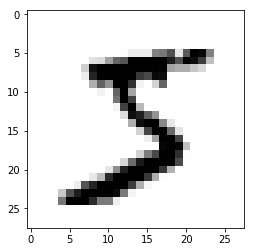

In [29]:
plt.imshow(scaled_image, cmap='binary')

In [30]:
x_train.shape

(60000, 28, 28)

In [31]:
# batch_size, width, height, color_channels
x_train = x_train.reshape(60000,28,28,1)

In [32]:
x_train.shape

(60000, 28, 28, 1)

In [33]:
x_test = x_test.reshape(10000,28,28,1)

In [34]:
x_test.shape

(10000, 28, 28, 1)

In [35]:
from tensorflow.keras.models import Sequential

In [36]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [38]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

# output layer softmax -> multi class
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [41]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - accuracy: 0.9591 - loss: 0.1383 - val_accuracy: 0.9850 - val_loss: 0.0492
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - accuracy: 0.9850 - loss: 0.0470 - val_accuracy: 0.9859 - val_loss: 0.0443
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - accuracy: 0.9905 - loss: 0.0303 - val_accuracy: 0.9843 - val_loss: 0.0484


In [42]:
metrics = pd.DataFrame(model.history.history)

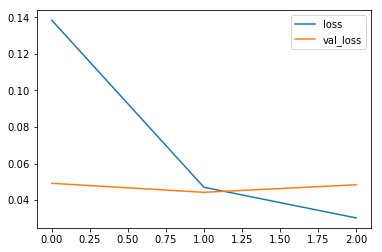

In [44]:
metrics[['loss', 'val_loss']].plot()

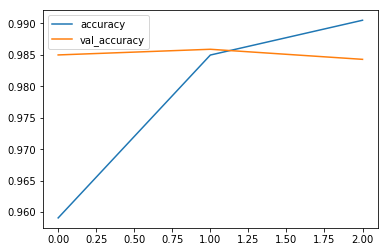

In [45]:
metrics[['accuracy', 'val_accuracy']].plot()

In [46]:
model.metrics_names

['loss', 'accuracy']

In [47]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04839123785495758, 0.9843000173568726]

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [50]:
y_cat_test.shape

(10000, 10)

In [51]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.94      0.99      0.97       892
           6       1.00      0.96      0.98       958
           7       1.00      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [53]:
confusion_matrix(y_test,predictions)

array([[ 972,    1,    2,    0,    0,    3,    0,    1,    1,    0],
       [   0, 1134,    0,    0,    0,    1,    0,    0,    0,    0],
       [   0,    2, 1023,    2,    0,    0,    0,    2,    3,    0],
       [   0,    0,    2,  999,    0,    7,    0,    0,    2,    0],
       [   0,    1,    0,    0,  975,    0,    0,    0,    0,    6],
       [   1,    1,    1,    3,    0,  885,    1,    0,    0,    0],
       [   9,    4,    0,    0,    1,   18,  922,    0,    4,    0],
       [   0,    4,   15,    5,    0,    1,    0,  996,    3,    4],
       [   4,    0,    3,    1,    0,    9,    0,    0,  955,    2],
       [   1,    1,    1,    1,    4,   15,    0,    0,    4,  982]])

In [54]:
import seaborn as sns

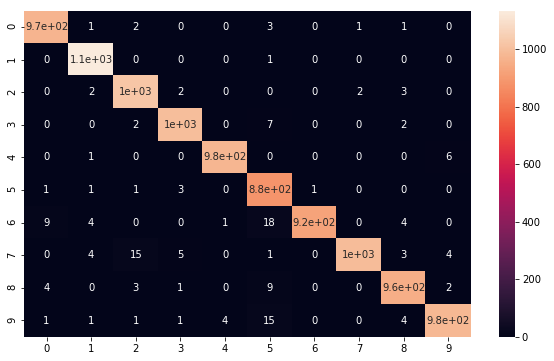

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

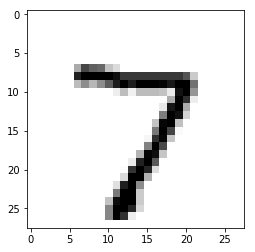

In [58]:
my_number = x_test[0]
plt.imshow(my_number.reshape(28,28), cmap='binary')

In [59]:
# num_images, width, height, color_channels
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])